In [84]:
# Import libraries & Load Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 

In [85]:
# Define the path to the Excel file
file_path = r"D:\Github\CHURN_ANALYSIS\Prediction_Data.xlsx"
# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'
# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path,sheet_name=sheet_name)
# Display the first few rows of the fetched data
print(data.head)


<bound method NDFrame.head of      Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0      11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1      11114-PUN    Male   51      No          Punjab                    5   
2      11167-WES  Female   43     Yes     West Bengal                    3   
3      11179-MAH    Male   35      No     Maharashtra                   10   
4      11180-TAM    Male   75     Yes      Tamil Nadu                   12   
...          ...     ...  ...     ...             ...                  ...   
6002   99898-MAH  Female   39      No     Maharashtra                    2   
6003   99912-WES  Female   60     Yes     West Bengal                   11   
6004   99942-KER    Male   59     Yes          Kerala                    8   
6005   99942-TEL  Female   34      No       Telangana                    0   
6006   99962-AND  Female   63      No  Andhra Pradesh                    7   

      Tenure_in_Months Value_Deal

DATA PREPROCESSING 

In [86]:
#Drop columns that won't be used for prediction
data = data.drop(['Customer_ID','Churn_Category','Churn_Reason'],axis=1)
# List of columns to be label encoded
columns_to_encode = ['Gender','Married','State','Value_Deal','Phone_Service',
                     'Multiple_Lines','Internet_Service','Internet_Type','Online_Security',
                     'Online_Backup','Device_Protection_Plan','Premium_Support','Streaming_TV',
                     'Streaming_Movies','Streaming_Music','Unlimited_Data','Contract',
                     'Paperless_Billing','Payment_Method']

# Encode categorical variables except the target 
label_encoders = {}
for column in columns_to_encode:
    label_encoders [column] = LabelEncoder()
    data[column]=label_encoders[column].fit_transform(data[column])
# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data ['Customer_Status'].map ({'Stayed':0,'Churned':1
})

# Split data into feature and target
X = data.drop('Customer_Status',axis=1)
y = data['Customer_Status']

# Split data into trainning and testing sét
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

TRAIN RANDOM FOREST MODEL

In [87]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier (n_estimators=100, random_state=42)
# Train the model
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

EVALUATE MODEL

Confusion Matrix:
[[775  72]
 [130 225]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       847
           1       0.76      0.63      0.69       355

    accuracy                           0.83      1202
   macro avg       0.81      0.77      0.79      1202
weighted avg       0.83      0.83      0.83      1202



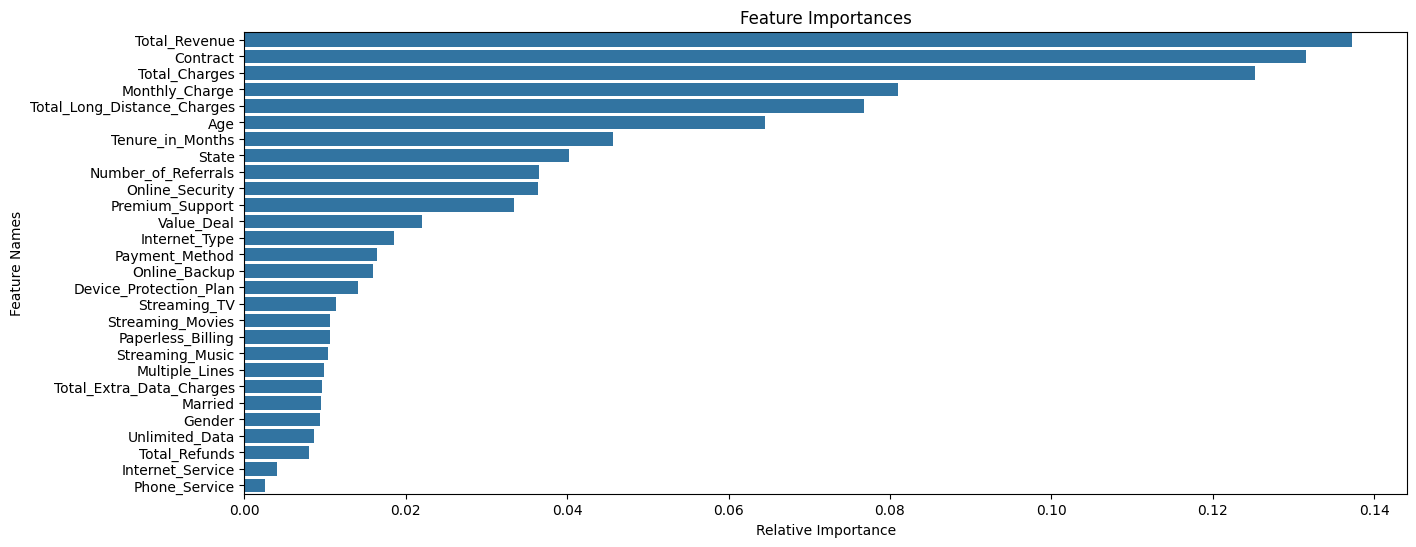

In [88]:
#Evaluate Model
y_pred = rf_model.predict(X_test)
# Evaluate the model
print ('Confusion Matrix:')
print (confusion_matrix(y_test, y_pred))
print ('\nClassification Report:')
print ( classification_report(y_test,y_pred))
# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indicies = np.argsort(importances)[::-1]
#Plot the feature importances
plt.figure (figsize=(15,6))
sns.barplot (x = importances[indicies], y = X.columns[indicies])
plt.title("Feature Importances")
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

USE MODE FOR PREDICTION ON NEW DATA

In [89]:
# Define the path to the Joiner Data Excel file
file_path = r"D:\Github\CHURN_ANALYSIS\Prediction_Data.xlsx"
# Define the sheet name to read data from
sheet_name = 'vw_JoinData'
# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path,sheet_name=sheet_name)
# Display the first few rows of the fetched data
print(new_data.head)
# Retain the original DataFrame to preserve unencoded column
original_data = new_data.copy()
print(new_data)
# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']
# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID','Churn_Category','Customer_Status','Churn_Reason'],axis=1)
# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes (include = ['object']).columns:
   new_data[column] = label_encoders [column].transform(new_data[column])
# Make predictions
new_predictions = rf_model.predict(new_data)
# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions
# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]
# Save the results
original_data.to_csv(r"D:\Github\CHURN_ANALYSIS\Predictions.csv", index = False)



<bound method NDFrame.head of     Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0     11751-TAM  Female   18      No   Tamil Nadu                    5   
1     12056-WES    Male   27      No  West Bengal                    2   
2     12136-RAJ  Female   25     Yes    Rajasthan                    2   
3     12257-ASS  Female   39      No        Assam                    9   
4     12340-DEL  Female   51     Yes        Delhi                    0   
..          ...     ...  ...     ...          ...                  ...   
406   99488-KAR    Male   50     Yes    Karnataka                   10   
407   99515-ASS    Male   34      No        Assam                   11   
408   99855-MAH  Female   50     Yes  Maharashtra                    5   
409   99862-BIH  Female   30      No        Bihar                   12   
410   99996-HAR    Male   22     Yes      Haryana                    2   

     Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0          